In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Display the Dataset

In [3]:
df = pd.read_csv('D:/HKU/ARIN7102/project/customer_purchase_data.csv')  # 根据实际目录修改文件位置

print("dataset shape of df is", df.shape)

df

dataset shape of df is (1500, 9)


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [109]:
# Statistical summary
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


# Customer Demographics

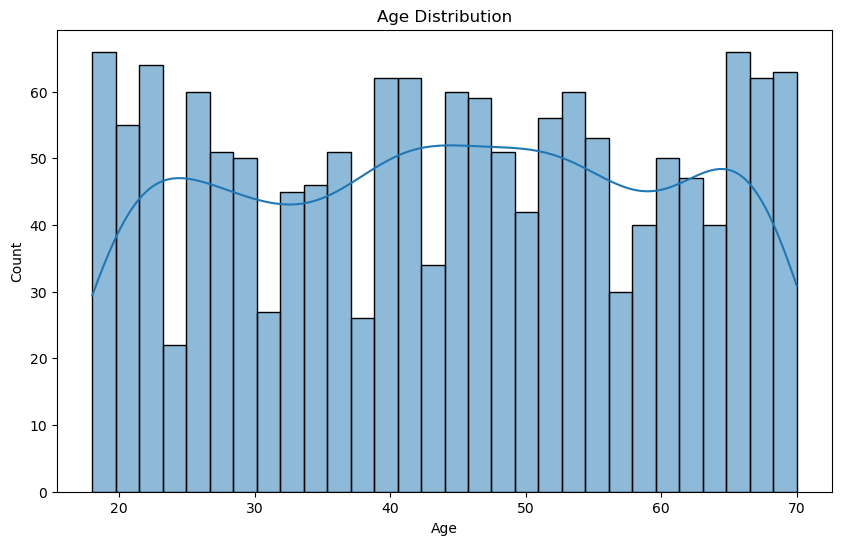

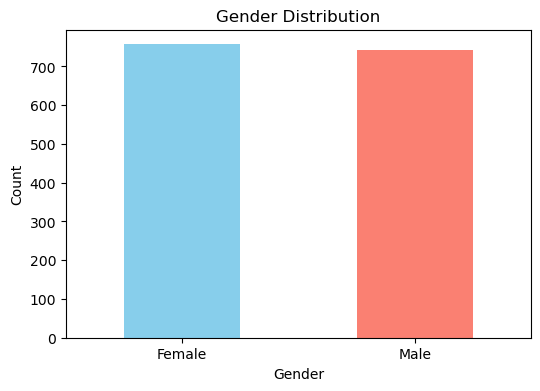

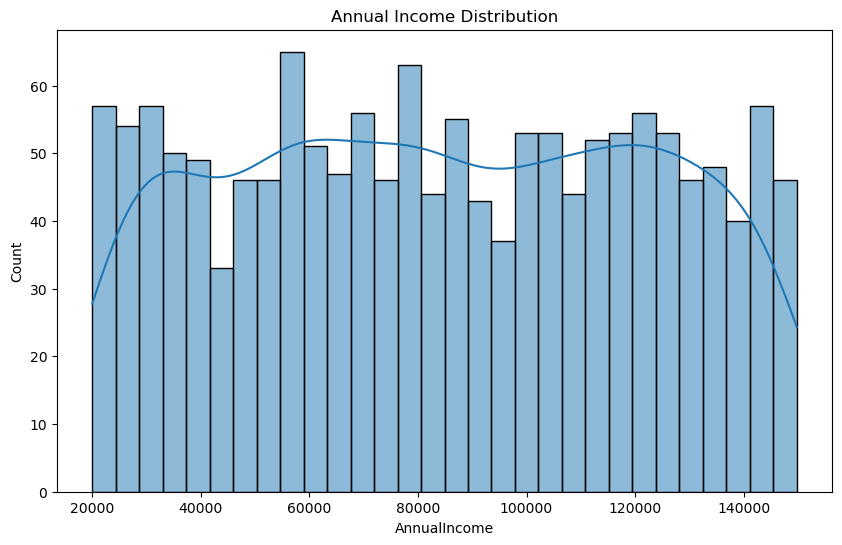

In [47]:
# Age
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Gender
plt.figure(figsize=(6, 4))
gender_counts = df['Gender'].value_counts().rename({0: 'Male', 1: 'Female'})
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Annual Income
plt.figure(figsize=(10,6))
sns.histplot(df['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

# Data Visualization

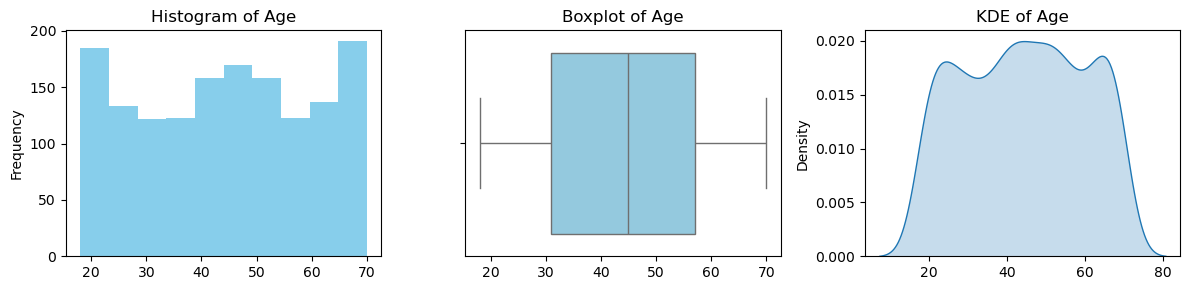

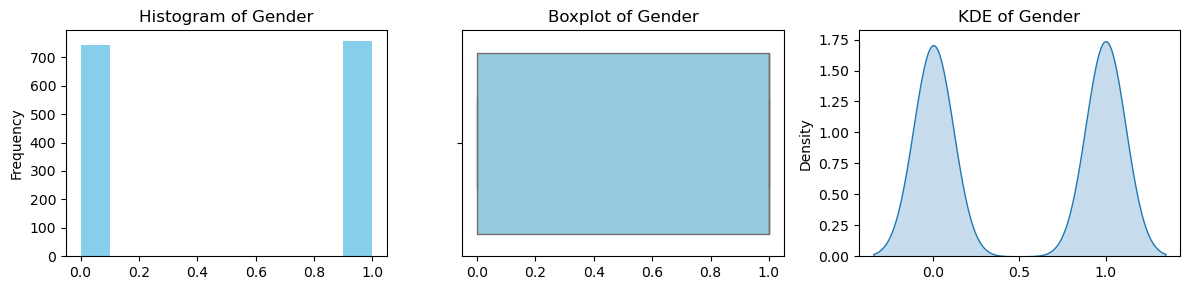

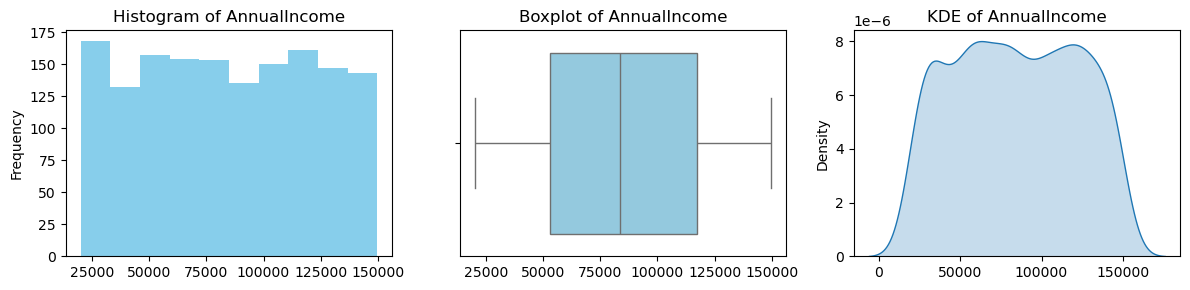

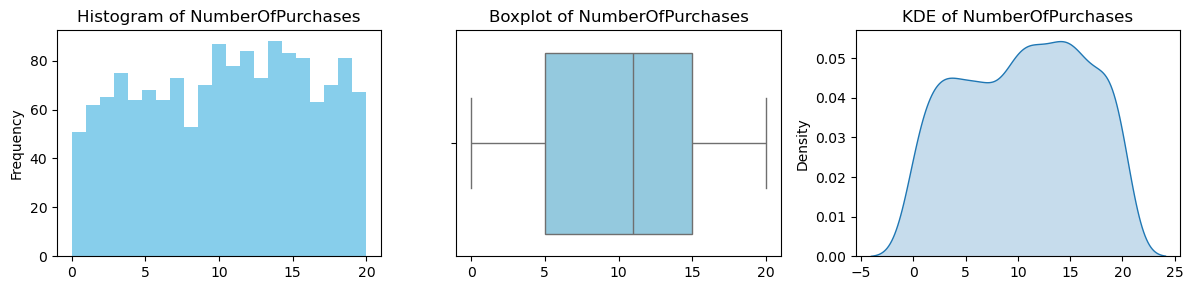

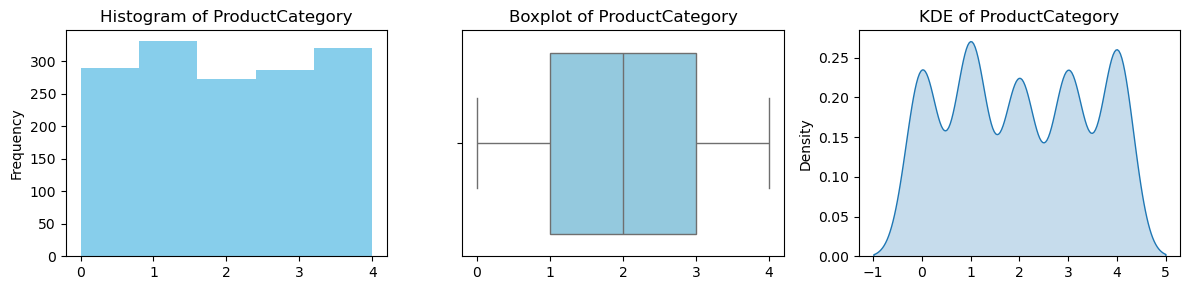

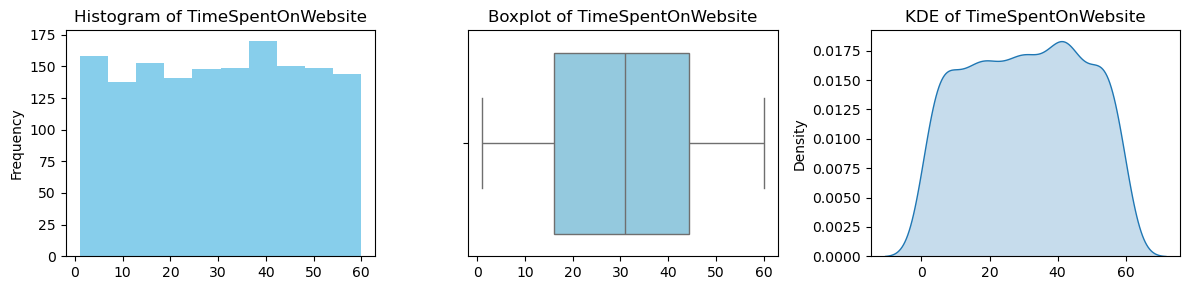

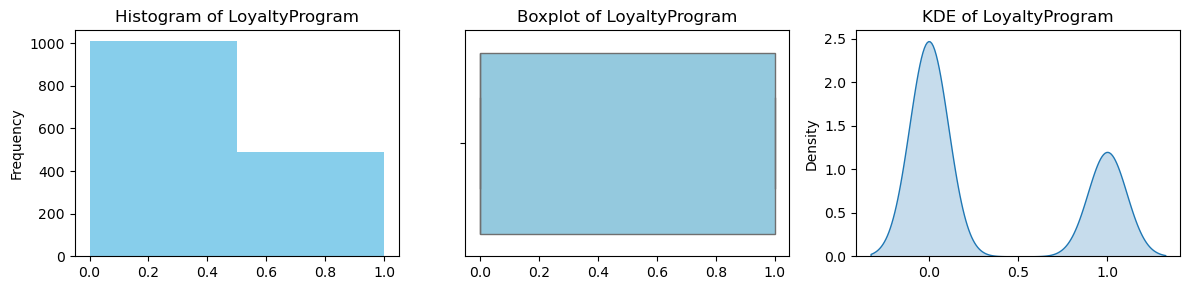

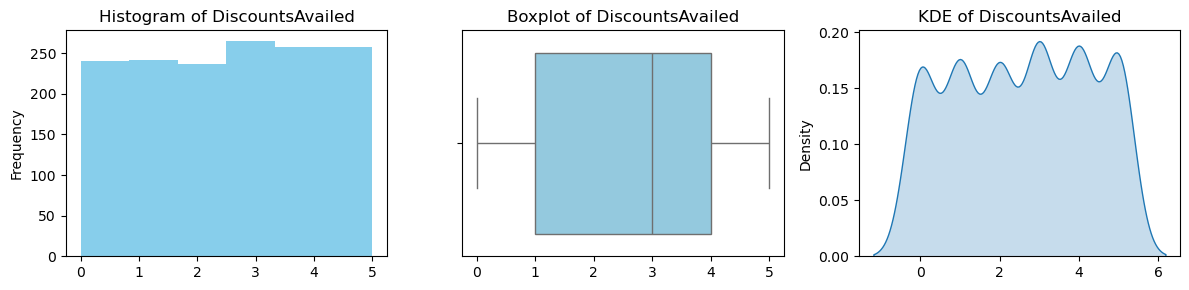

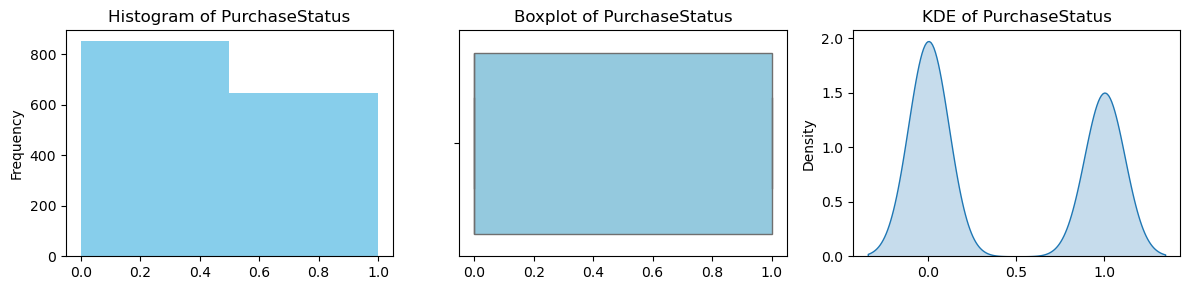

In [59]:
def plot_quantitative_var_distributions(df, var_list, bin_dict=None):
    
    for col in var_list:
        plt.figure(figsize=(12, 3))
    
        # Histogramm
        plt.subplot(1, 3, 1)
        if col in bin_dict:
            df[col].plot.hist(color='skyblue', bins=bin_dict[col])
        else:    
            df[col].plot.hist(color='skyblue')
        plt.title(f'Histogram of {col}')
        
        # Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel('')

        # KDE
        plt.subplot(1, 3, 3)
        sns.kdeplot(df[col], fill=True)
        plt.title(f'KDE of {col}')
        plt.xlabel('')

        plt.tight_layout()
        plt.show()

variables = df.select_dtypes(include='number').columns.tolist()
custom_bins = df[col].nunique().to_dict()
plot_quantitative_var_distributions(df, variables, custom_bins)

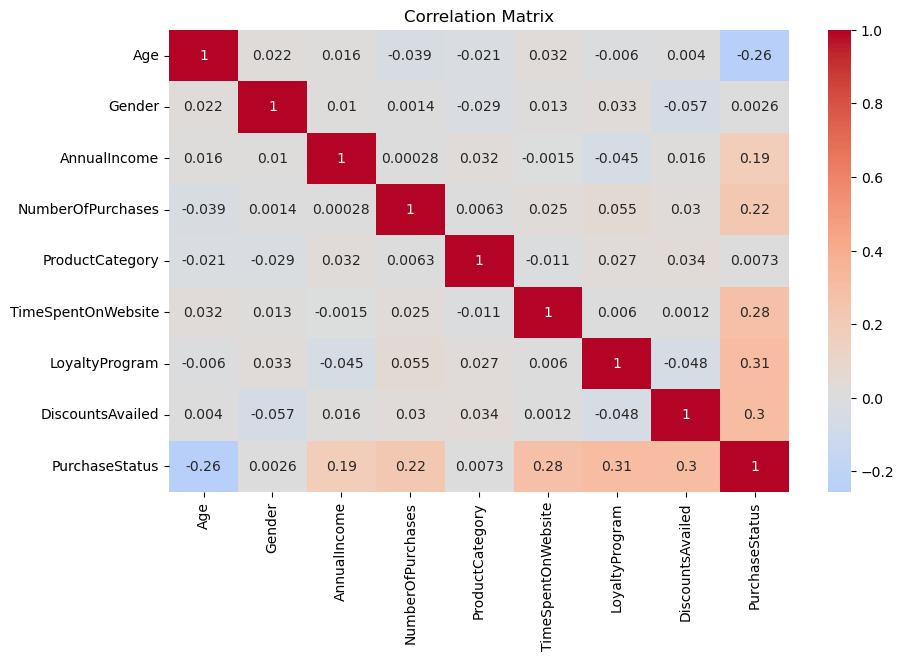

In [65]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

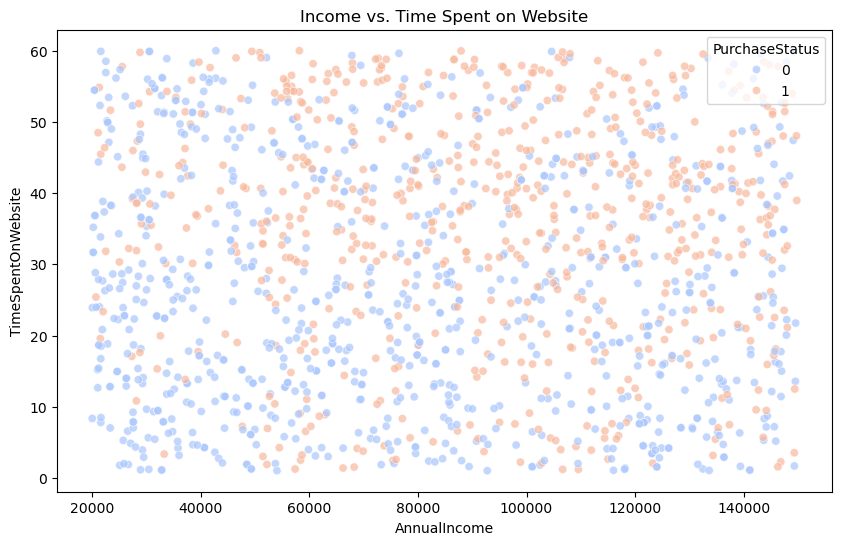

C:\Users\yxsun\AppData\Local\Temp\ipykernel_13612\3610473207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='TimeSpentOnWebsite',


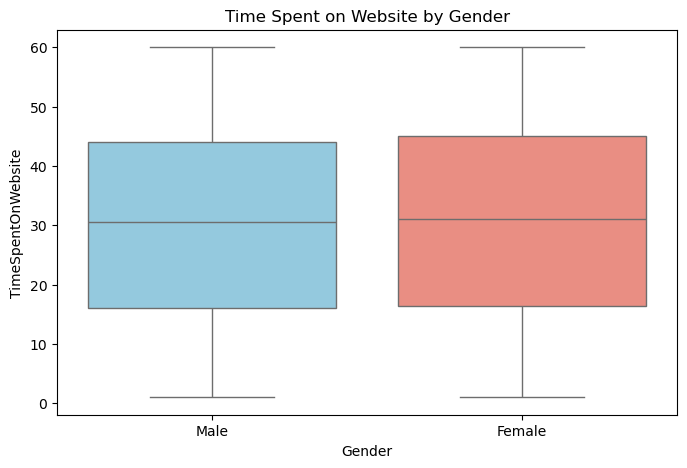

In [163]:
# Annual Income vs. Time Spent on Website
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='TimeSpentOnWebsite', 
                hue='PurchaseStatus', palette='coolwarm', alpha=0.7)
plt.title('Income vs. Time Spent on Website')
plt.show()

# Time Spent on Website by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='TimeSpentOnWebsite', 
            palette={'0': 'skyblue', '1': 'salmon'})
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Time Spent on Website by Gender')
plt.show()

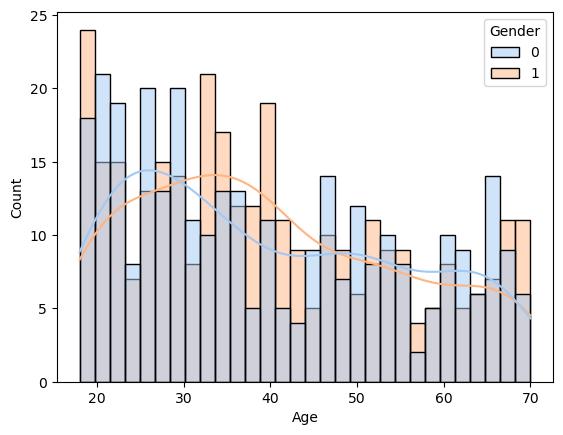

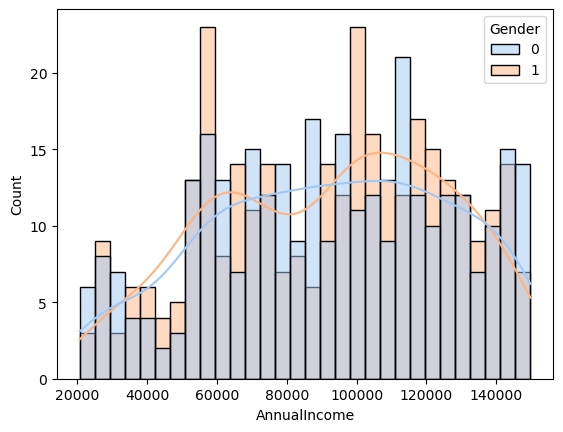

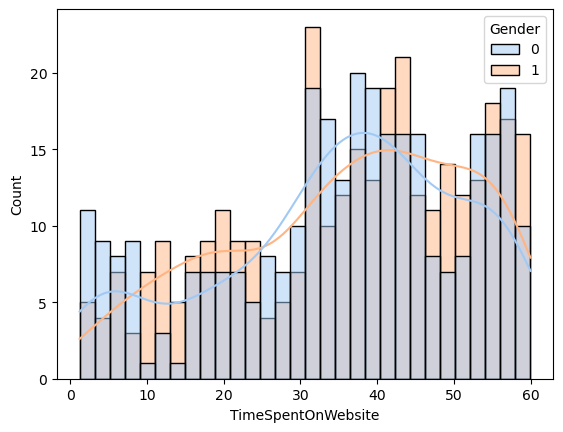

In [10]:
purchased_df = df[df['PurchaseStatus'] == 1]
df_dist = ['Age', 'AnnualIncome', 'TimeSpentOnWebsite']
for col in df_dist:
    sns.histplot(x=col, data=purchased_df, bins=30, kde=True, hue='Gender',  palette='pastel')
    plt.show()

# Data Pre-processing

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

In [8]:
df.isnull().sum() # Caluculate missing values

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [10]:
numeric_features = ['Age', 'AnnualIncome', 'TimeSpentOnWebsite', 'NumberOfPurchases', 'DiscountsAvailed']
categorical_features = ['Gender', 'ProductCategory', 'LoyaltyProgram']  # 需要编码的分类变量
target = 'PurchaseStatus'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

X_scaled = preprocessor.fit_transform(df.drop('PurchaseStatus', axis=1))
y = df[target]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# 获取特征名称
numeric_features_transformed = numeric_features  
categorical_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = list(numeric_features_transformed) + list(categorical_features_transformed)

# 划分训练集测试集
train_df = pd.DataFrame(x_train, columns=all_features)
train_df[target] = y_train.reset_index(drop=True)

test_df = pd.DataFrame(x_test, columns=all_features)
test_df[target] = y_test.reset_index(drop=True)

# 保存为CSV文件
train_df.to_csv('cleaned_train_data.csv', index=False)
test_df.to_csv('cleaned_test_data.csv', index=False)

print("预处理后的训练集和测试集已保存为 cleaned_train_data.csv 和 cleaned_test_data.csv")

预处理后的训练集和测试集已保存为 cleaned_train_data.csv 和 cleaned_test_data.csv


# Classification Models For Prediction

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Decision Tree Classifier:
 Accuracy: 0.91
 Precision: 0.9316239316239316
 Recall: 0.8515625
 F1 Score: 0.889795918367347


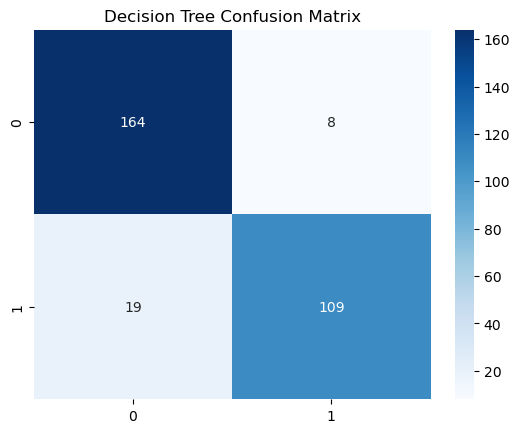

In [19]:
# Decision Tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

Logistic Regression:
 Accuracy: 0.8366666666666667
 Precision: 0.8761904761904762
 Recall: 0.71875
 F1 Score: 0.7896995708154506


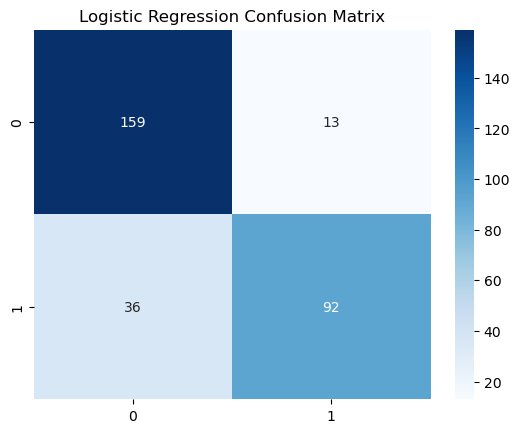

In [21]:
# Logistic Regression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

print(f'Logistic Regression:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Support Vector Machine:
 Accuracy: 0.8733333333333333
 Precision: 0.8879310344827587
 Recall: 0.8046875
 F1 Score: 0.8442622950819673


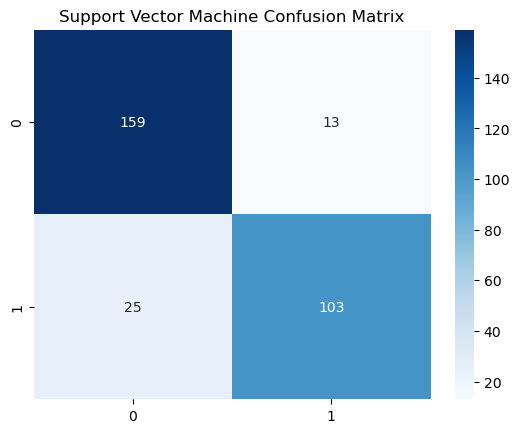

In [23]:
# Support Vector Machine

svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

Random Forest:
 Accuracy: 0.9466666666666667
 Precision: 0.9827586206896551
 Recall: 0.890625
 F1 Score: 0.9344262295081968


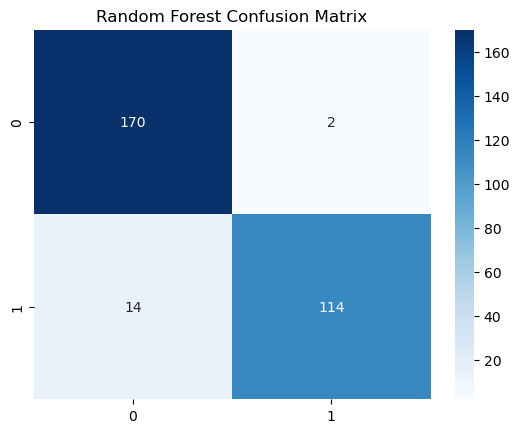

In [101]:
# Random Forest

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [119]:
# 对Random Forest调参

from sklearn.model_selection import GridSearchCV
'''
# 定义超参数网格
param_grid = {
    'n_estimators': [300],  # 森林中树的数量
    'max_depth': [5, 10, 15, 20],  # 尝试多个深度
    'min_samples_split': [2, 3, 4],  # 尝试更小的分裂样本数
    'min_samples_leaf': [1, 2],     # 尝试较少的叶子节点样本数
    'max_features': ['sqrt'],  # 固定为平方根
    'class_weight': ['balanced', None]  # 尝试平衡类权重
}
'''
# 选取最优值，并进一步尝试小范围调参
param_grid = {
    'n_estimators': [300], 
    'max_depth': [10], 
    'min_samples_split': [3],  
    'min_samples_leaf': [1],   
    'max_features': ['sqrt'], 
    'class_weight': ['balanced'] 
}

# 使用 GridSearchCV 进行超参数调优
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

# 输出最佳参数和最佳得分
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Best Cross-validation Score: 0.9166666666666666


Random Forest (Tuned):
 Accuracy: 0.9533333333333334
 Precision: 0.9830508474576272
 Recall: 0.90625
 F1 Score: 0.943089430894309


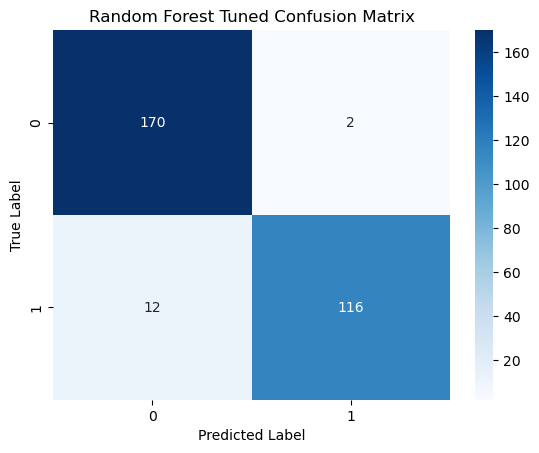

In [120]:
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_rf)
precision_best_rf = precision_score(y_test, y_pred_rf)
recall_best_rf = recall_score(y_test, y_pred_rf)
f1_best_rf = f1_score(y_test, y_pred_rf)
cm_best_rf = confusion_matrix(y_test, y_pred_rf)

# 输出性能指标
print(f'Random Forest (Tuned):\n Accuracy: {accuracy_best_rf}\n Precision: {precision_best_rf}\n Recall: {recall_best_rf}\n F1 Score: {f1_best_rf}')

# 绘制混淆矩阵
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Tuned Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()